In [1]:
!pip install -q tensorflow==2.0.0-beta1

tensorflow-serving-api 1.14.0 has requirement tensorflow~=1.14.0, but you'll have tensorflow 2.0.0b1 which is incompatible.
You are using pip version 10.0.1, however version 19.3.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [2]:
!pip install -q statsmodels==0.9.0

tensorflow-serving-api 1.14.0 has requirement tensorflow~=1.14.0, but you'll have tensorflow 2.0.0b1 which is incompatible.
You are using pip version 10.0.1, however version 19.3.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [3]:
!pip install -q scipy==1.2

tensorflow-serving-api 1.14.0 has requirement tensorflow~=1.14.0, but you'll have tensorflow 2.0.0b1 which is incompatible.
You are using pip version 10.0.1, however version 19.3.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [4]:
!pip install -q pyramid.arima

tensorflow-serving-api 1.14.0 has requirement tensorflow~=1.14.0, but you'll have tensorflow 2.0.0b1 which is incompatible.
You are using pip version 10.0.1, however version 19.3.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [5]:
import os
import csv
import random
import statsmodels.api as sm
import statsmodels.formula.api as smf
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.preprocessing import MinMaxScaler

In [6]:
import boto3 
import botocore 
import pandas as pd 
from sagemaker import get_execution_role 

role = get_execution_role() 

bucket = 'enter_bucket_name' 
data_key = 'enter_csv_name.csv'
data_location = 's3://{}/{}'.format(bucket, data_key) 

df = pd.read_csv(data_location)

In [7]:
from pandas import DataFrame

In [8]:
tseries=df['Price']
tseries

0       18.63
1       18.45
2       18.55
3       18.60
4       18.63
5       18.60
6       18.60
7       18.58
8       18.65
9       18.68
10      18.75
11      18.78
12      18.65
13      18.75
14      18.78
15      18.78
16      18.68
17      18.78
18      18.90
19      19.03
20      19.05
21      19.05
22      19.10
23      18.90
24      18.75
25      18.70
26      19.08
27      19.15
28      19.08
29      18.98
        ...  
8186    59.03
8187    60.60
8188    59.81
8189    58.64
8190    58.64
8191    58.44
8192    60.42
8193    60.59
8194    61.04
8195    58.55
8196    57.93
8197    60.68
8198    62.70
8199    61.28
8200    63.99
8201    64.67
8202    63.02
8203    60.76
8204    61.25
8205    68.42
8206    65.59
8207    64.29
8208    64.25
8209    65.23
8210    64.66
8211    64.13
8212    62.41
8213    62.08
8214    62.48
8215    60.99
Name: Price, Length: 8216, dtype: float64

In [9]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(tseries)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -1.954749
p-value: 0.306759
Critical Values:
	1%: -3.431
	5%: -2.862
	10%: -2.567


In [10]:
tsdiff=np.log(tseries)

In [11]:
result = adfuller(tsdiff)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -1.613410
p-value: 0.476186
Critical Values:
	1%: -3.431
	5%: -2.862
	10%: -2.567


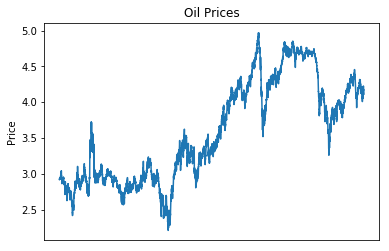

In [12]:
import matplotlib.pyplot as plt
plt.plot(tsdiff)
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off
plt.ylabel('Price')
plt.title("Oil Prices")
plt.show()

In [13]:
df=pd.DataFrame(tsdiff)
df

,Price
0,2.924773
1,2.915064
2,2.920470
3,2.923162
4,2.924773
5,2.923162
6,2.923162
7,2.922086
8,2.925846
9,2.927453


In [14]:
# Form dataset matrix
def create_dataset(df, previous=1):
    dataX, dataY = [], []
    for i in range(len(df)-previous-1):
        a = df[i:(i+previous), 0]
        dataX.append(a)
        dataY.append(df[i + previous, 0])
    return np.array(dataX), np.array(dataY)

In [15]:
df=np.array(df)

In [16]:
df

array([[2.92477318],
       [2.91506437],
       [2.92046979],
       ...,
       [4.12842388],
       [4.13484651],
       [4.11070992]])

In [17]:
# normalize dataset with MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
df = scaler.fit_transform(df)
df

array([[0.25948897],
       [0.2559728 ],
       [0.25793044],
       ...,
       [0.69540609],
       [0.69773213],
       [0.68899076]])

In [18]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

# Training and Validation data partition
train_size = int(len(df) * 0.8)
val_size = len(df) - train_size
train, val = df[0:train_size,:], df[train_size:len(df),:]

# Number of previous
previous = 500
X_train, Y_train = create_dataset(train, previous)
X_val, Y_val = create_dataset(val, previous)

In [19]:
X_train

array([[0.25948897, 0.2559728 , 0.25793044, ..., 0.26945914, 0.26431659,
        0.2797141 ],
       [0.2559728 , 0.25793044, 0.25890531, ..., 0.26431659, 0.2797141 ,
        0.27415651],
       [0.25793044, 0.25890531, 0.25948897, ..., 0.2797141 , 0.27415651,
        0.26277874],
       ...,
       [0.94306793, 0.94274392, 0.95262698, ..., 0.87933295, 0.88254847,
        0.88504519],
       [0.94274392, 0.95262698, 0.95308549, ..., 0.88254847, 0.88504519,
        0.88094428],
       [0.95262698, 0.95308549, 0.93808763, ..., 0.88504519, 0.88094428,
        0.87016019]])

In [20]:
Y_train

array([0.27415651, 0.26277874, 0.26718257, ..., 0.88094428, 0.87016019,
       0.8655946 ])

Train on 4856 samples, validate on 1215 samples
Epoch 1/60
4856/4856 - 9s - loss: 0.0077 - val_loss: 0.0075
Epoch 2/60
4856/4856 - 8s - loss: 0.0040 - val_loss: 0.0045
Epoch 3/60
4856/4856 - 8s - loss: 0.0035 - val_loss: 0.0085
Epoch 4/60
4856/4856 - 8s - loss: 0.0035 - val_loss: 0.0106
Epoch 5/60
4856/4856 - 8s - loss: 0.0032 - val_loss: 0.0089
Epoch 6/60
4856/4856 - 8s - loss: 0.0026 - val_loss: 0.0237
Epoch 7/60
4856/4856 - 8s - loss: 0.0028 - val_loss: 0.0112
Epoch 8/60
4856/4856 - 8s - loss: 0.0031 - val_loss: 0.0032
Epoch 9/60
4856/4856 - 8s - loss: 0.0025 - val_loss: 0.0024
Epoch 10/60
4856/4856 - 8s - loss: 0.0074 - val_loss: 0.0561
Epoch 11/60
4856/4856 - 8s - loss: 0.0074 - val_loss: 0.0251
Epoch 12/60
4856/4856 - 8s - loss: 0.0070 - val_loss: 0.0319
Epoch 13/60
4856/4856 - 8s - loss: 0.0066 - val_loss: 0.0293
Epoch 14/60
4856/4856 - 8s - loss: 0.0064 - val_loss: 0.0260
Epoch 15/60
4856/4856 - 8s - loss: 0.0053 - val_loss: 0.0243
Epoch 16/60
4856/4856 - 8s - loss: 0.0059 - va

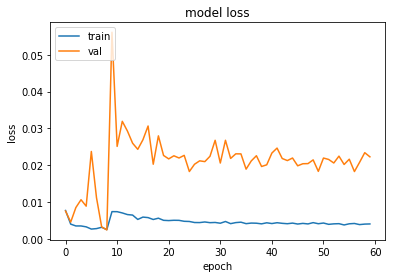

In [21]:
from tensorflow.keras.layers import Dropout

# reshape input to be [samples, time steps, features]
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_val = np.reshape(X_val, (X_val.shape[0], 1, X_val.shape[1]))

# Generate LSTM network
model = tf.keras.Sequential()
model.add(LSTM(4, input_shape=(1, previous)))
model.add(Dropout(0.05))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
history=model.fit(X_train, Y_train, validation_split=0.2, epochs=60, batch_size=1, verbose=2)

# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [22]:
# Generate predictions
trainpred = model.predict(X_train)
valpred = model.predict(X_val)

In [23]:
trainpred

array([[0.27005732],
       [0.26809362],
       [0.26045114],
       ...,
       [0.717236  ],
       [0.7171772 ],
       [0.7170148 ]], dtype=float32)

In [24]:
valpred

array([[0.6909593 ],
       [0.691109  ],
       [0.69122636],
       ...,
       [0.6993333 ],
       [0.69873965],
       [0.6981284 ]], dtype=float32)

In [25]:
# Convert predictions back to normal values
trainpred = scaler.inverse_transform(trainpred)
Y_train = scaler.inverse_transform([Y_train])
valpred = scaler.inverse_transform(valpred)
Y_val = scaler.inverse_transform([Y_val])
predictions = valpred

In [26]:
import math
from sklearn.metrics import mean_squared_error

# calculate RMSE
trainScore = math.sqrt(mean_squared_error(Y_train[0], trainpred[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
valScore = math.sqrt(mean_squared_error(Y_val[0], valpred[:,0]))
print('Validation Score: %.2f RMSE' % (valScore))

Train Score: 0.21 RMSE
Validation Score: 0.14 RMSE


In [27]:
# Train predictions
trainpredPlot = np.empty_like(df)
trainpredPlot[:, :] = np.nan
trainpredPlot[previous:len(trainpred)+previous, :] = trainpred

In [28]:
# Validation predictions
valpredPlot = np.empty_like(df)
valpredPlot[:, :] = np.nan
valpredPlot[len(trainpred)+(previous*2)+1:len(df)-1, :] = valpred

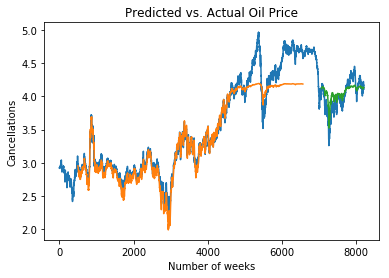

In [29]:
# Plot all predictions
inversetransform, =plt.plot(scaler.inverse_transform(df))
trainpred, =plt.plot(trainpredPlot)
valpred, =plt.plot(valpredPlot)
plt.xlabel('Number of weeks')
plt.ylabel('Cancellations')
plt.title("Predicted vs. Actual Oil Price")
plt.show()

In [30]:
Y_val=Y_val.reshape(-1)
Y_val.shape
Y_val=pd.Series(Y_val)

In [31]:
Y_val

0       4.032824
1       4.026066
2       4.039888
3       4.045504
4       4.055084
5       4.082947
6       4.096509
7       4.115943
8       4.114147
9       4.096343
10      4.096343
11      4.137723
12      4.142500
13      4.140910
14      4.136925
15      4.158414
16      4.157319
17      4.160912
18      4.168524
19      4.181134
20      4.192983
21      4.173310
22      4.156067
23      4.140273
24      4.175771
25      4.194642
26      4.183271
27      4.169607
28      4.176692
29      4.150725
          ...   
1113    4.090838
1114    4.078046
1115    4.104295
1116    4.091173
1117    4.071417
1118    4.071417
1119    4.068001
1120    4.101320
1121    4.104130
1122    4.111529
1123    4.069881
1124    4.059235
1125    4.105614
1126    4.138361
1127    4.115454
1128    4.158727
1129    4.169297
1130    4.143452
1131    4.106932
1132    4.114964
1133    4.225665
1134    4.183423
1135    4.163404
1136    4.162782
1137    4.177919
1138    4.169143
1139    4.160912
1140    4.1337

In [32]:
predictions=predictions.reshape(-1)
predictions.shape
predictions=pd.Series(predictions)

In [33]:
predictions

0       4.116145
1       4.116559
2       4.116883
3       4.118299
4       4.119608
5       4.120427
6       4.123280
7       4.125632
8       4.128027
9       4.130324
10      4.130513
11      4.130886
12      4.132909
13      4.135809
14      4.136835
15      4.137360
16      4.138818
17      4.140067
18      4.140641
19      4.141828
20      4.143280
21      4.144634
22      4.145051
23      4.144490
24      4.143413
25      4.144401
26      4.145617
27      4.146122
28      4.145693
29      4.145658
          ...   
1113    4.119498
1114    4.121377
1115    4.121797
1116    4.123794
1117    4.125307
1118    4.123641
1119    4.123224
1120    4.122835
1121    4.124637
1122    4.126203
1123    4.126760
1124    4.123971
1125    4.121284
1126    4.122262
1127    4.125421
1128    4.126514
1129    4.130345
1130    4.132813
1131    4.134193
1132    4.133357
1133    4.132395
1134    4.139112
1135    4.139823
1136    4.139397
1137    4.139330
1138    4.139511
1139    4.139296
1140    4.1392

In [34]:
import numpy as np

def mda(actual: np.ndarray, predicted: np.ndarray):
    """ Mean Directional Accuracy """
    return np.mean((np.sign(actual[1:] - actual[:-1]) == np.sign(predicted[1:] - predicted[:-1])).astype(int))

In [35]:
mda(Y_val, predictions)

0.9982502187226596

In [36]:
# https://machinelearningmastery.com/time-series-forecasting-performance-measures-with-python/

from sklearn.metrics import mean_squared_error
from math import sqrt
mse = mean_squared_error(Y_val, predictions)
rmse = sqrt(mse)
print('RMSE: %f' % rmse)

RMSE: 0.143191


In [37]:
forecast_error = (predictions-Y_val)
forecast_error

0       0.083321
1       0.090493
2       0.076994
3       0.072794
4       0.064524
5       0.037481
6       0.026771
7       0.009689
8       0.013880
9       0.033981
10      0.034170
11     -0.006838
12     -0.009591
13     -0.005101
14     -0.000090
15     -0.021054
16     -0.018501
17     -0.020845
18     -0.027883
19     -0.039306
20     -0.049703
21     -0.028676
22     -0.011016
23      0.004217
24     -0.032358
25     -0.050242
26     -0.037654
27     -0.023485
28     -0.030999
29     -0.005067
          ...   
1113    0.028660
1114    0.043332
1115    0.017502
1116    0.032621
1117    0.053890
1118    0.052224
1119    0.055224
1120    0.021515
1121    0.020507
1122    0.014674
1123    0.056879
1124    0.064736
1125    0.015669
1126   -0.016100
1127    0.009967
1128   -0.032212
1129   -0.038952
1130   -0.010639
1131    0.027262
1132    0.018393
1133   -0.093270
1134   -0.044311
1135   -0.023581
1136   -0.023385
1137   -0.038590
1138   -0.029632
1139   -0.021617
1140    0.0055

In [38]:
mean_forecast_error = np.mean(forecast_error)
mean_forecast_error

0.04453484335788945